## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
print(f'tf version={tf.__version__}')

/Users/vmaudgalya/anaconda3/envs/dtx/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tf version=1.13.1


In [2]:
# Specify the dataset
mnist = tf.keras.datasets.mnist

# Download the data the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Training Data
X_train=(60000, 28, 28)
y_train=(60000,)
Num classes=10

Testing Data
X_test=(10000, 28, 28)
y_test=(10000,)

Example shape:
(28, 28)

Display:


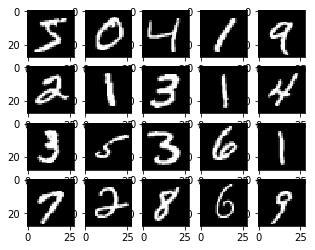

In [3]:
# Explore the dataset
print('Training Data')
print(f'X_train={X_train.shape}')
print(f'y_train={y_train.shape}')
print(f'Num classes={np.unique(y_train).size}\n')

print('Testing Data')
print(f'X_test={X_test.shape}')
print(f'y_test={y_test.shape}\n')

index_of_interest = 0
print(f'Example shape:\n{X_train[index_of_interest].shape}\n')
print('Display:')
plt.figure(figsize=(5, 5))
columns=5
num_samples = 20
for i, sample in enumerate(X_train[:num_samples]):
    plt.subplot(num_samples/columns+1, columns, i+1)
    plt.imshow(X_train[i], cmap='gray')
#     plt.show()

In [4]:
# Preprocess the data
X_train = X_train / 255
X_test = X_test / 255

Source: https://keras.io/losses/#sparse_categorical_crossentropy

Note: when using the `categorical_crossentropy` loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample, in other words, one-hot encoded). In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical:

```python
from keras.utils import to_categorical
categorical_labels = to_categorical(int_labels, num_classes=None)
```

When using the `sparse_categorical_crossentropy` loss, your targets should be integer targets. If you have categorical targets, you should use categorical_crossentropy

In [5]:
# Define the model
model = Sequential()
model.add(Flatten(input_shape=X_train[0].shape))  # Flatten is useful for dynamic input. Prefer numpy in this case
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()  # Trainable params: ((28*28*128)+128)+((128*10)+10)

# Configure the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define a callback for stopping training early
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        """
        Called at the end of an epoch.
        
        Keyword Arguments:
        epoch: integer, index of epoch.
        logs: dict, metric results for this training epoch, and
              for the validation epoch if validation is performed.
              Validation result keys are prefixed with val_.
        """
        current_accuracy = logs.get('acc')
        if (current_accuracy is not None and current_accuracy >= 0.99):
            print(f'Reached {current_accuracy}% accuracy so cancelling training!')
            self.model.stop_training = True
            
# Initialize the callback            
cb = EarlyStoppingCallback()

# Train the model, using the early stopping callback
history = model.fit(X_train, y_train, epochs=10, callbacks=[cb])

Epoch 1/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2601 - acc: 0.9256
Epoch 2/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.1163 - acc: 0.9656
Epoch 3/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0815 - acc: 0.9750
Epoch 4/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.0596 - acc: 0.9813
Epoch 5/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0455 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0373 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0293 - acc: 0.9905


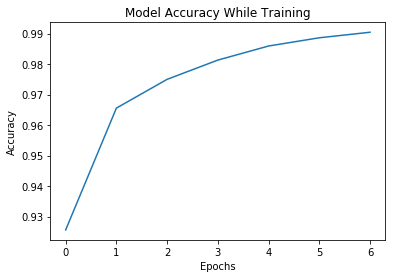

In [7]:
# Plot learning curves
plt.plot(history.history['acc'])
plt.title('Model Accuracy While Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [8]:
# Get test accuracy
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0734 - acc: 0.9770


[0.07343324270590675, 0.977]

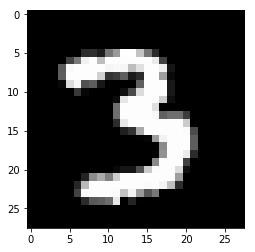

In [9]:
plt.imshow(X_test[500], cmap='gray')

In [10]:
classifications = model.predict(X_test)

In [11]:
print(classifications[500])

[2.1297505e-14 1.0313987e-12 9.6555090e-11 1.0000000e+00 5.6728063e-14
 3.7153378e-11 8.0574361e-19 5.3826193e-13 7.2370548e-10 3.6555278e-10]
